In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import scipy
import talib

from tqdm.notebook import tqdm
plt.rcParams["figure.figsize"] = (20, 10)

In [68]:
sym = 'ETHUSD'

url = f'https://www.bitmex.com/api/v1/trade/bucketed?binSize=1h&partial=true&symbol={sym}&count=1000&reverse=true'

data = requests.get(url).json()

rows = []
rows.extend(data)

i = 0

while i < 10:
    endtime = data[-1]['timestamp']
    data = requests.get(url + f'&endTime={endtime}').json()
    rows.extend(data)
    i += 1


cf = pd.DataFrame(rows)
cf = cf.sort_values('timestamp').drop_duplicates().reset_index(drop=True)

logret = np.log(cf['close'].shift(-1)) - np.log(cf['close'])

cf['logret'] = logret
cf['abs_logret'] = abs(logret)

cf

,timestamp,symbol,open,high,low,close,trades,volume,vwap,lastSize,turnover,homeNotional,foreignNotional,logret,abs_logret
0,2024-06-04T22:00:00.000Z,ETHUSD,3811.15,3824.15,3807.60,3815.90,295,3059,3816.11,1.0,1167346800,215.538668,8.225187e+05,0.000563,0.000563
1,2024-06-04T23:00:00.000Z,ETHUSD,3815.90,3825.35,3813.35,3818.05,210,2449,3820.76,5.0,935700870,172.861353,6.604596e+05,-0.001363,0.001363
2,2024-06-05T00:00:00.000Z,ETHUSD,3818.05,3819.05,3810.85,3812.85,591,3095,3815.34,1.0,1180846120,218.387175,8.332203e+05,0.002645,0.002645
3,2024-06-05T01:00:00.000Z,ETHUSD,3812.85,3832.35,3811.50,3822.95,1388,4264,3822.71,1.0,1629998240,301.536349,1.152684e+06,0.001020,0.001020
4,2024-06-05T02:00:00.000Z,ETHUSD,3822.95,3843.10,3816.45,3826.85,2750,12067,3836.84,1.0,4629904930,857.635971,3.290617e+06,-0.005227,0.005227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10985,2025-09-05T15:00:00.000Z,ETHUSD,4445.59,4445.29,4266.66,4277.38,4022,48251,4336.06,1.0,20921863113,5369.885303,2.328507e+07,0.000970,0.000970
10986,2025-09-05T16:00:00.000Z,ETHUSD,4277.38,4307.89,4257.00,4281.53,1950,7574,4282.39,1.0,3243472164,837.941206,3.588400e+06,0.003988,0.003988
10987,2025-09-05T17:00:00.000Z,ETHUSD,4281.53,4305.21,4276.22,4298.64,898,3735,4289.54,1.0,1602138852,413.563430,1.773993e+06,-0.001816,0.001816
10988,2025-09-05T18:00:00.000Z,ETHUSD,4298.64,4299.35,4274.36,4290.84,370,2052,4287.55,20.0,879803227,226.890215,9.728019e+05,-0.000203,0.000203


<Axes: ylabel='Frequency'>

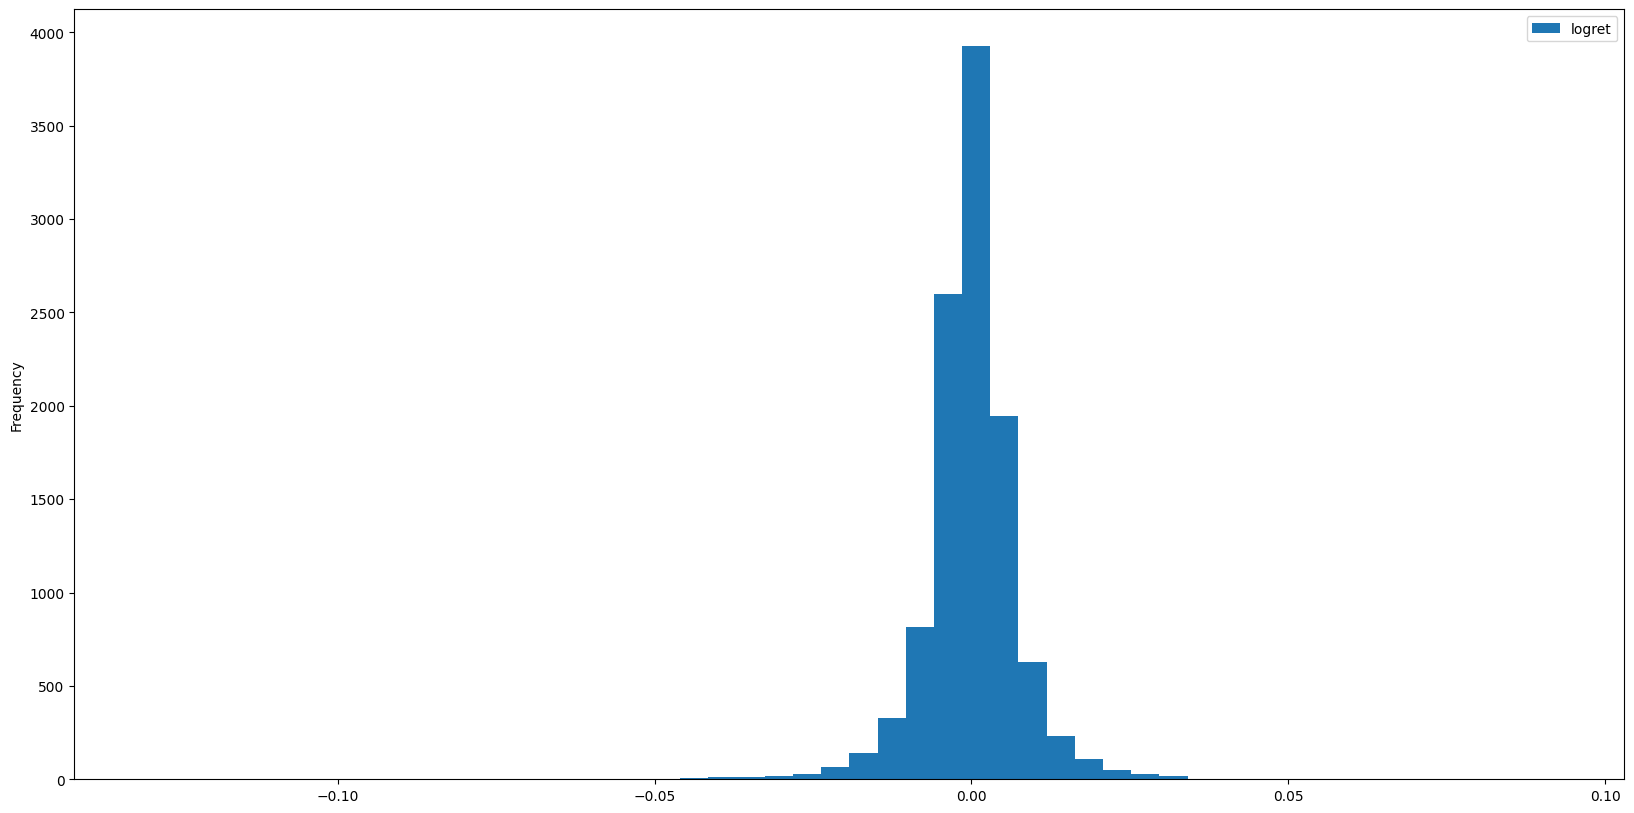

In [69]:
cf.plot(y='logret', kind='hist', bins=50)

In [70]:
cf.sort_values('abs_logret', ascending=False)

,timestamp,symbol,open,high,low,close,trades,volume,vwap,lastSize,turnover,homeNotional,foreignNotional,logret,abs_logret
5835,2025-02-03T01:00:00.000Z,ETHUSD,2872.75,2873.08,2772.08,2828.26,2976,39420,2824.10,4.0,11132545074,3805.327948,1.074693e+07,-0.130460,0.130460
6498,2025-03-02T16:00:00.000Z,ETHUSD,2196.98,2292.93,2197.41,2231.74,6560,61441,2249.09,1.0,13818553133,5349.948275,1.203353e+07,0.091922,0.091922
1467,2024-08-05T01:00:00.000Z,ETHUSD,2689.26,2697.61,2483.62,2528.40,4280,121696,2597.65,4.0,31612191282,6914.531829,1.796611e+07,-0.085834,0.085834
7411,2025-04-09T17:00:00.000Z,ETHUSD,1485.83,1508.81,1483.18,1502.98,627,6752,1500.02,4.0,1012808585,525.182854,7.877881e+05,0.084609,0.084609
7352,2025-04-07T06:00:00.000Z,ETHUSD,1548.40,1561.67,1536.50,1540.42,1865,35462,1546.19,3.0,5483059426,2728.106194,4.218170e+06,-0.073870,0.073870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7020,2025-03-24T10:00:00.000Z,ETHUSD,2092.86,2096.95,2087.02,2095.72,836,4332,2091.73,1.0,906134042,378.057227,7.907907e+05,0.000000,0.000000
8981,2025-06-14T03:00:00.000Z,ETHUSD,2560.36,2561.15,2561.15,2561.15,1,1,2561.15,1.0,256115,0.105485,2.701635e+02,0.000000,0.000000
10118,2025-07-31T12:00:00.000Z,ETHUSD,3858.26,3861.41,3830.00,3840.72,479,2525,3846.21,4.0,971166975,299.117754,1.150469e+06,0.000000,0.000000
2405,2024-09-13T03:00:00.000Z,ETHUSD,2360.58,2363.78,2357.05,2359.54,147,2104,2360.01,5.0,496544017,122.256790,2.885261e+05,0.000000,0.000000


<Axes: xlabel='timestamp'>

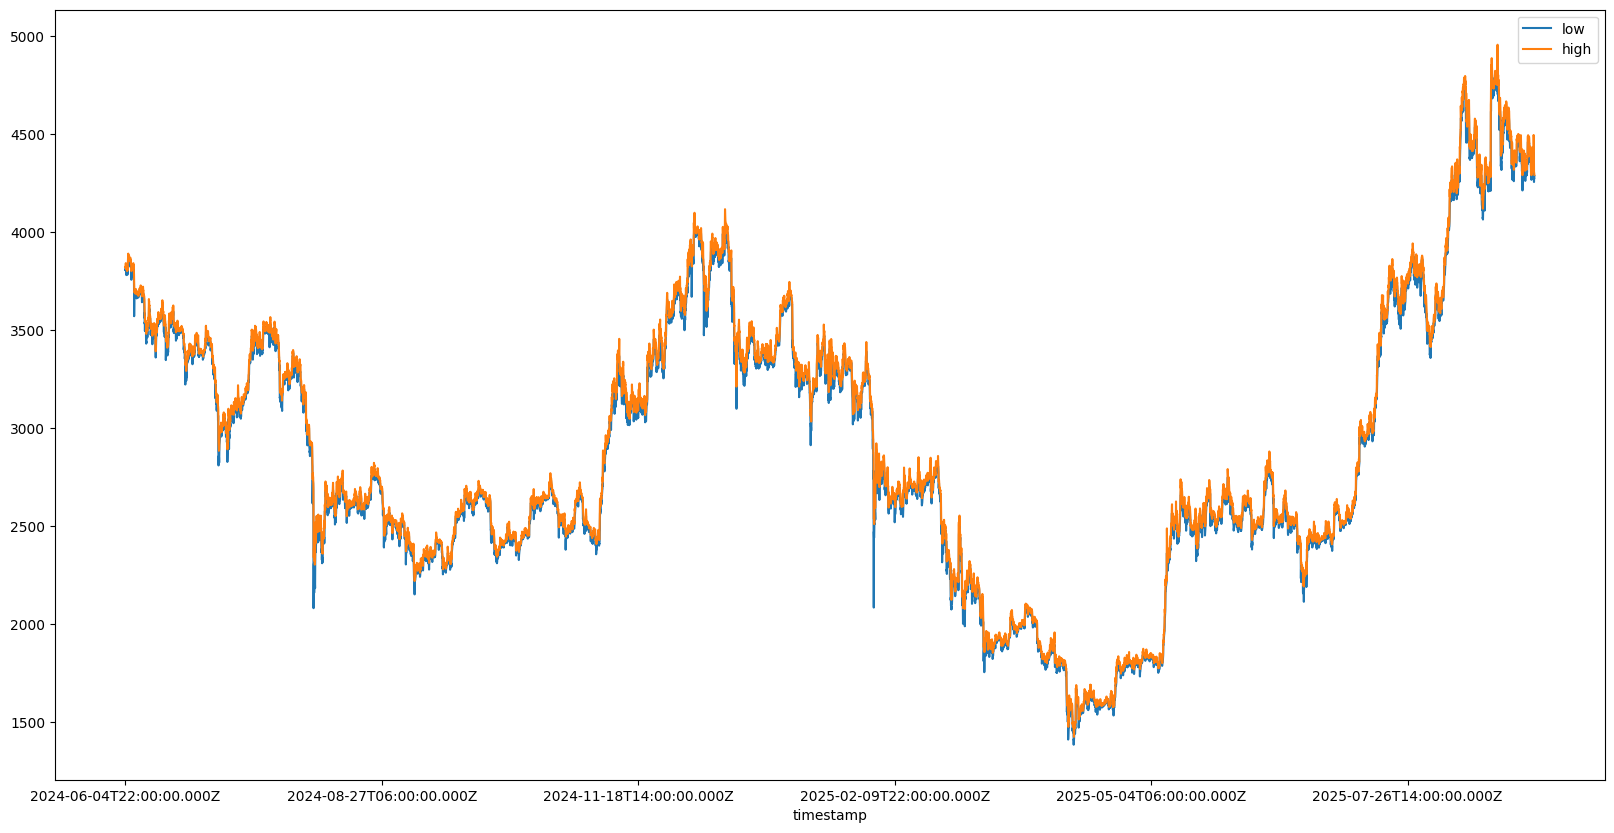

In [71]:
cf.plot(x='timestamp', y=['low', 'high'])

In [72]:
cf['rsi'] = talib.RSI(cf['close'])

In [73]:
xf = cf[['timestamp', 'close', 'volume', 'rsi', 'logret']].dropna()
xf['futret'] = xf['logret'].shift(-3)
xf = xf

xf

,timestamp,close,volume,rsi,logret,futret
14,2024-06-05T12:00:00.000Z,3805.25,4400,45.686513,0.004615,0.005293
15,2024-06-05T13:00:00.000Z,3822.85,9013,52.915598,-0.005403,-0.003556
16,2024-06-05T14:00:00.000Z,3802.25,5814,45.313365,-0.001395,0.010136
17,2024-06-05T15:00:00.000Z,3796.95,9277,43.578663,0.005293,0.001664
18,2024-06-05T16:00:00.000Z,3817.10,5435,51.223876,-0.003556,0.007790
...,...,...,...,...,...,...
10984,2025-09-05T14:00:00.000Z,4445.59,28879,62.257590,-0.038572,-0.001816
10985,2025-09-05T15:00:00.000Z,4277.38,48251,38.258213,0.000970,-0.000203
10986,2025-09-05T16:00:00.000Z,4281.53,7574,38.884167,0.003988,NaN
10987,2025-09-05T17:00:00.000Z,4298.64,3735,41.516745,-0.001816,NaN


,grsi,up,count,prob_up
0,2.5,0,0,NaN
1,7.5,4,6,0.666667
2,12.5,16,29,0.551724
3,17.5,34,72,0.472222
4,22.5,77,162,0.475309
5,27.5,156,314,0.496815
6,32.5,260,477,0.545073
7,37.5,493,913,0.539978
8,42.5,764,1477,0.517265
9,47.5,929,1786,0.520157


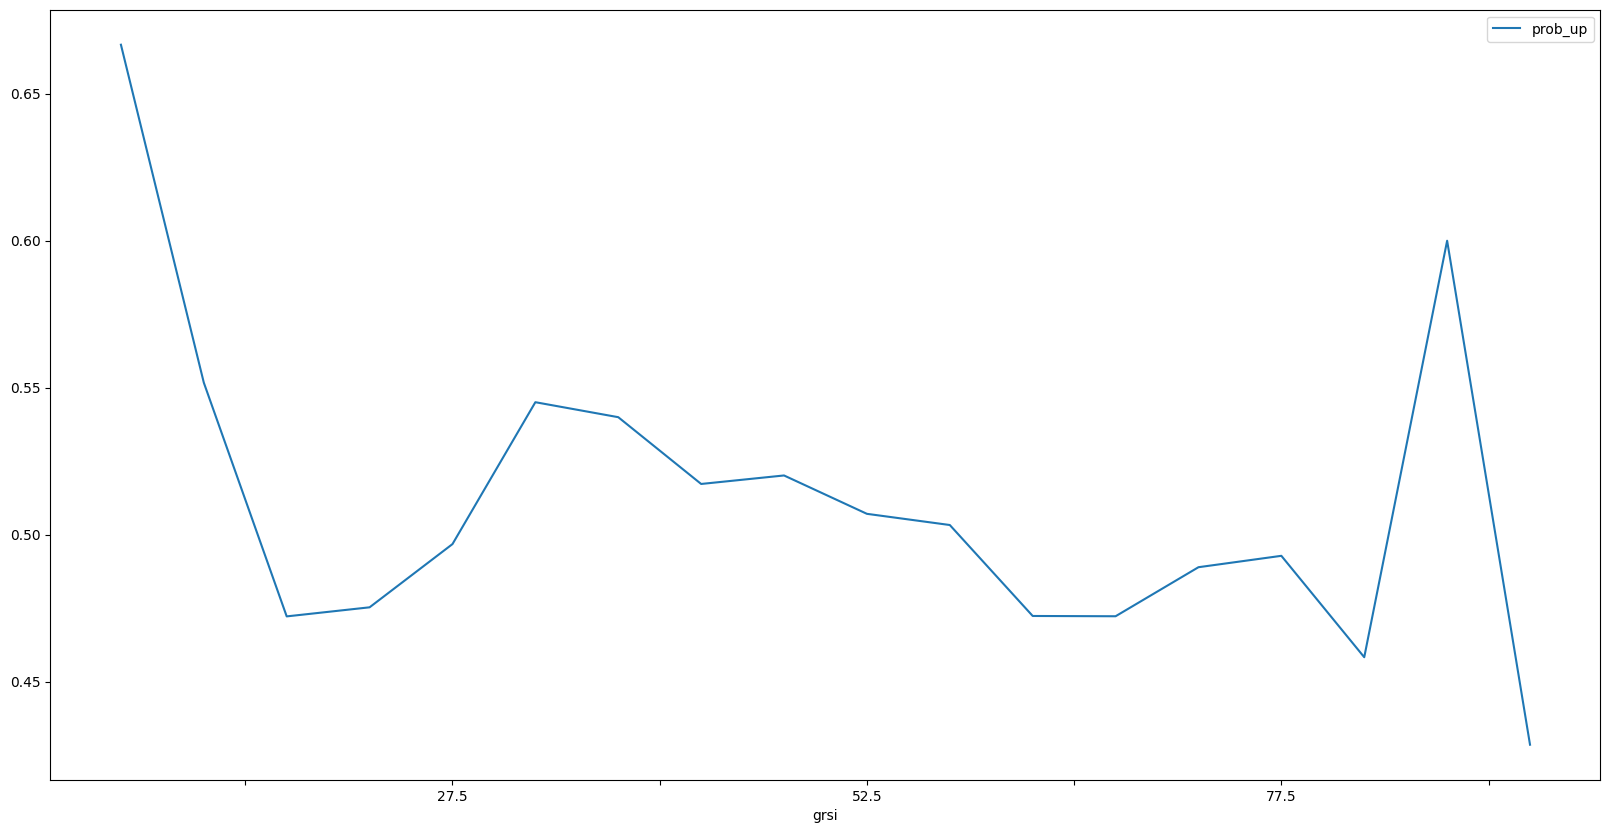

In [75]:
xf['grsi'] = pd.cut(xf['rsi'], np.arange(0, 101, 5)).apply(lambda x: x.mid)

xf['up'] = xf['futret'].apply(lambda x: 1 if x > 0 else 0)

yf = xf.groupby('grsi').agg({'up': sum, 'rsi': len}).reset_index()

yf.columns = ['grsi', 'up', 'count']
yf['prob_up'] = yf['up'] / yf['count']

yf.plot(x='grsi', y='prob_up')
yf

<Axes: >

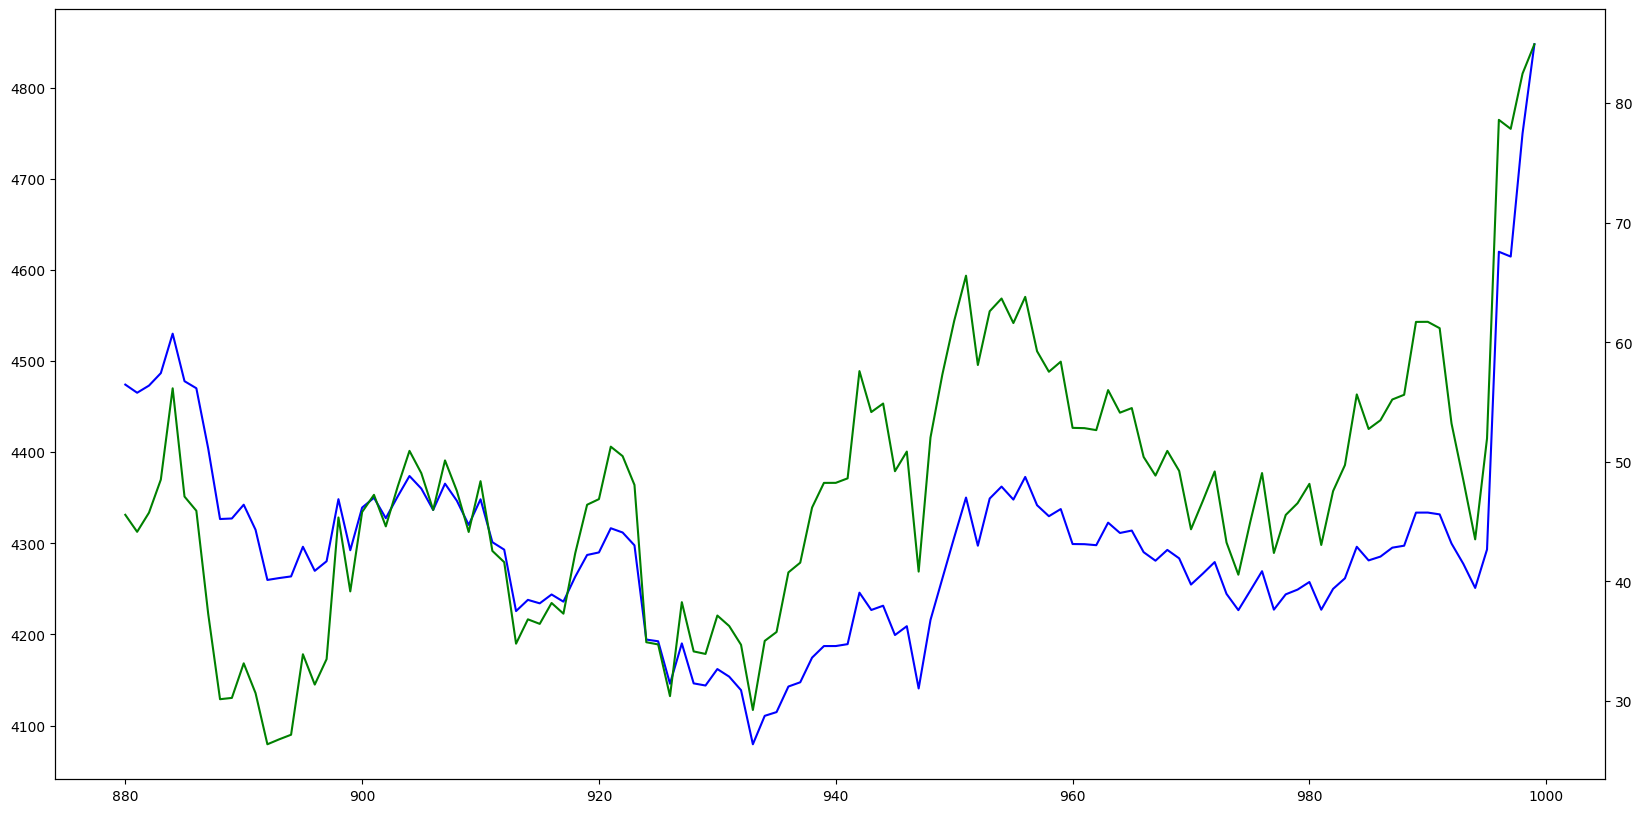

In [56]:
fig, ax1 = plt.subplots()

N = 120

ax2 = ax1.twinx()

cf['close'][-N:].plot(ax=ax1, style='b-')

cf['rsi'][-N:].plot(ax=ax2, style='g-')

In [57]:
cf

,timestamp,symbol,open,high,low,close,trades,volume,vwap,lastSize,turnover,homeNotional,foreignNotional,logret,abs_logret,rsi
0,2025-07-12T03:00:00.000Z,ETHUSD,2960.46,2973.00,2956.05,2958.59,1893,2920,2965.64,1,865964309,343.772743,1.019504e+06,0.003243,0.003243,NaN
1,2025-07-12T04:00:00.000Z,ETHUSD,2958.59,2970.64,2957.35,2968.20,1339,1940,2964.38,1,575088616,228.467346,6.772631e+05,-0.004911,0.004911,NaN
2,2025-07-12T05:00:00.000Z,ETHUSD,2968.20,2970.67,2943.68,2953.66,1293,5936,2954.36,3,1753703001,698.959339,2.064974e+06,0.000454,0.000454,NaN
3,2025-07-12T06:00:00.000Z,ETHUSD,2953.66,2959.90,2945.44,2955.00,588,1913,2952.95,1,564896617,225.120072,6.647654e+05,0.002923,0.002923,NaN
4,2025-07-12T07:00:00.000Z,ETHUSD,2955.00,2965.00,2948.16,2963.65,450,1858,2955.19,1,549072877,218.978563,6.471223e+05,0.000354,0.000354,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2025-08-22T14:00:00.000Z,ETHUSD,4251.03,4323.88,4237.84,4293.27,1147,6154,4286.80,1,2638090221,691.460487,2.964169e+06,0.073340,0.073340,51.963409
996,2025-08-22T15:00:00.000Z,ETHUSD,4293.27,4651.61,4295.91,4619.97,4514,38141,4527.00,1,17266386484,4374.741219,1.980735e+07,-0.001146,0.001146,78.598827
997,2025-08-22T16:00:00.000Z,ETHUSD,4619.97,4672.93,4614.68,4614.68,1187,9564,4651.42,7,4448604149,1115.618454,5.189195e+06,0.028868,0.028868,77.846138
998,2025-08-22T17:00:00.000Z,ETHUSD,4614.68,4783.67,4620.81,4749.84,1708,17704,4732.69,27,8378739984,2063.136011,9.764154e+06,0.020385,0.020385,82.466242


## Looking into [Kelly Criterion](https://en.wikipedia.org/wiki/Kelly_criterion)

In [ ]:
import random

coinflip = lambda: -1 if random.random() > 0.6 else 1

def trial(t, bs):
    pot = 100
    n = 0
    while n < t:
        pot += bs * coinflip()
        n += 1
    return pot
  

def trials_mcs(bs):
    return [trial(100, bs) for _ in range(1000)]


tf = pd.DataFrame(trials_mcs(100))
tf['count'] = 1
tf.columns = ['pot', 'count']

tf['pot'].plot(kind='hist', bins=40)

a